# Particle Diffusion
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 1/31/2022|

## Python Imports

In [21]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# BA
$\tau_S=1.0,\,\epsilon=0.2$

## $\Pi=0.05$ (2048²)

### 1st run
![12593988](old/12593988.pbspl1.nas.nasa.gov.png)
  - Queued for 42.6 hr
  - Reached $53.4\,T$ in 15:08:10 walltime before crashing, implying 28.34 hr to finish ($100\,T$)
  - `stderr`:
    ```bash
    MPT ERROR: rank:3204, function:MPI_TEST, Message truncated on receive: An application bug caused the sender to send too much data
    MPT ERROR: Rank 3204(g:3204) is aborting with error code 0.
      Process ID: 10243, Host: r147i0n11, Program: /home6/sbaronet/athena-dust/bin/athena
      MPT Version: HPE MPT 2.23  11/19/20 04:21:56

    MPT: --------stack traceback-------
    MPT: gdb: symbol lookup error: gdb: undefined symbol: PyUnicodeUCS4_FromEncodedObject

    MPT: -----stack traceback ends-----
    MPT ERROR: MPI_COMM_WORLD rank 3204 has terminated without calling MPI_Finalize()
      aborting job
    MPT: Shepherd process aborted
    ```

## Max. Particle Displacement

### 64² zones: 128² = 16,384 particles

In [44]:
run = 'BA/0.05-64'
disp = np.load('../nonlinear/Pi/%s/output/disp.npz'%run)
disp['dxp']

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -0.25494776,  -0.25179594,  -0.25954394, ...,  -0.2503451 ,
         -0.25198499,  -0.25352553],
       [ -0.51186773,  -0.50286786,  -0.51893538, ...,  -0.50112995,
         -0.50252515,  -0.50415982],
       ...,
       [-18.31694273, -18.56812317, -18.6759086 , ..., -20.28336694,
        -17.80408925, -18.64023255],
       [-18.35808593, -18.64190237, -18.74121155, ..., -20.46281077,
        -18.08866062, -18.7657158 ],
       [-18.40630113, -18.69538693, -18.79548025, ..., -20.58383637,
        -18.2595769 , -19.03486937]])

ValueError: x and y must have same first dimension, but have shapes (101,) and (1,)

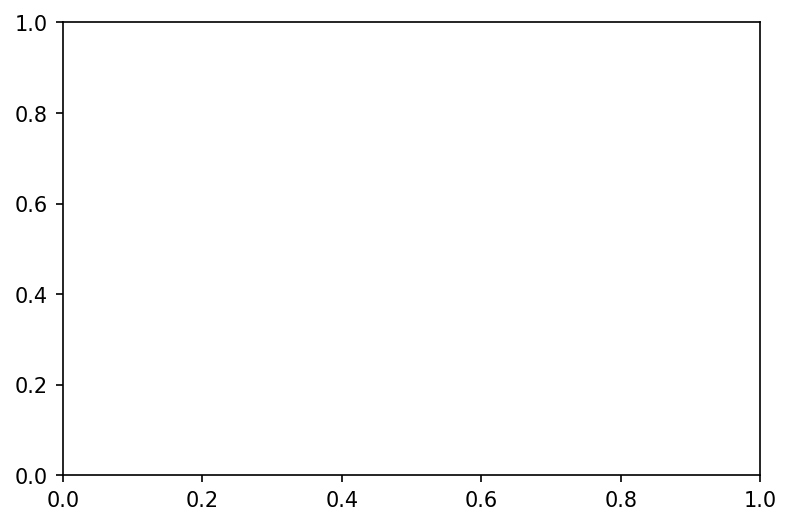

In [38]:
fig, ax = plt.subplots(dpi=150)
runs = ['BA/0.05-64']

for run in runs:
    disp = np.load('../nonlinear/Pi/%s/output/disp.npz'%run)
    ax.plot(disp['t'], np.amax(disp['dxp']), label=r'$\Delta x_\mathrm{max}$')
    ax.plot(disp['t'], np.amax(disp['dyp']), label=r'$\Delta z_\mathrm{max}$')

ax.grid()
ax.legend()
ax.minorticks_on()
ax.set(xlabel=r'$t\,/\,T$', ylabel=r'$\Delta x_{i,\mathrm{p,max}\,/\,H$')
ax.tick_params(axis='both', which='both', top=True, right=True)


### 2048² zones: 4096² = 16,777,216 particles